In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import gc
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('/kaggle/input/santander-value-prediction-challenge/train.csv')
test_df = pd.read_csv('/kaggle/input/santander-value-prediction-challenge/test.csv')

# EDA

In [3]:
print('Shape of train data', train_df.shape)
print('Shape of test data', test_df.shape)

Shape of train data (4459, 4993)
Shape of test data (49342, 4992)


In [4]:
# check for null values
print('num of null values in train set', train_df.isnull().sum().sum())

# check for null values
print('num of null values in test set', test_df.isnull().sum().sum())

num of null values in train set 0
num of null values in test set 0


In [5]:
train_df.head(10)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,002dbeb22,2800000.0,0.0,0,0.0,0,0,0,0,0,...,12000.0,5600000.0,20000000.0,0,0,0,0,0,0,11000
6,003925ac6,164000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,40000,0,0,0
7,003eb0261,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,004b92275,979000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,4000000.0,0,0,0,0,0,0,0
9,0067b4fef,460000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,400000


In [6]:
train_df.tail(10)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
4449,ff3d0e888,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4450,ff3e1f24c,21700000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4451,ff7b7c367,21320000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4452,ff7be29d2,400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4453,ff7cdeb16,4000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4454,ff85154c8,1065000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,ffb6b3f4f,48000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,ffcf61eb6,2800000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,ffea67e98,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4458,ffeb15d25,20000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [7]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,3147
1,float64,1845
2,object,1


Text(0.5, 1.0, 'Target Histogram')

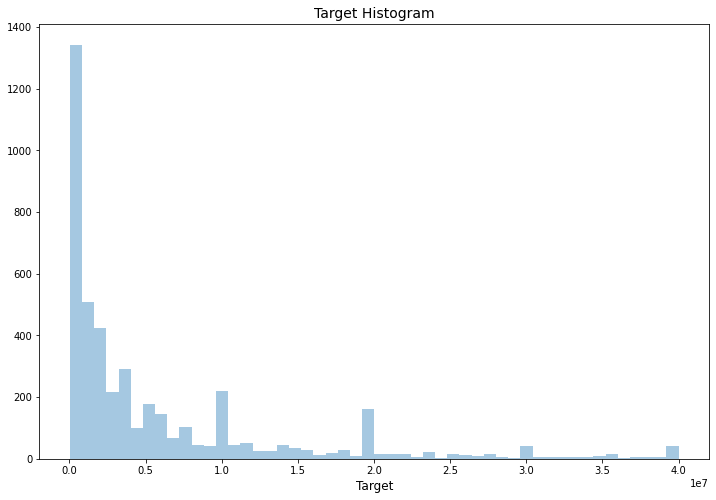

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(train_df["target"].values, bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Target Histogram", fontsize=14)


Text(0.5, 1.0, 'Log of Target Histogram')

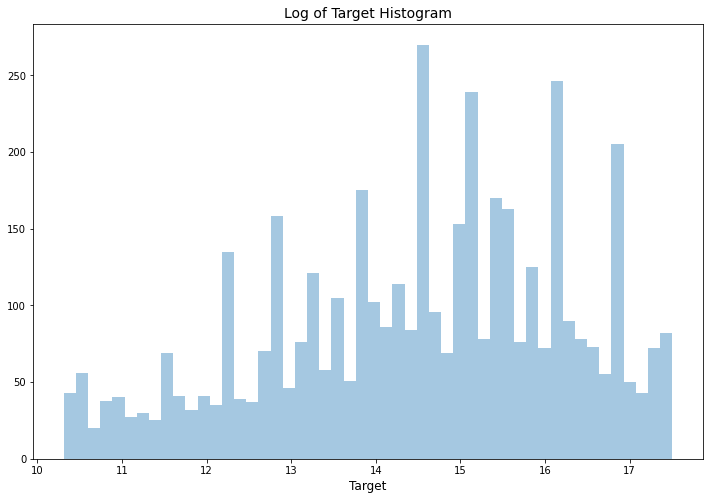

In [9]:
# use log1p instead of log to get the normalized value for even tiny values -> 0

plt.figure(figsize=(12,8))
sns.distplot( np.log1p(train_df["target"].values), bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Log of Target Histogram", fontsize=14)


In [10]:
# check and remove constant columns
colsToRemove = []
for col in train_df.columns:
    if col != 'ID' and col != 'target':
        if train_df[col].std() == 0: 
            colsToRemove.append(col)
        
# remove constant columns in the training set
train_df.drop(colsToRemove, axis=1, inplace=True)

# remove constant columns in the test set
test_df.drop(colsToRemove, axis=1, inplace=True) 

print(f"Removed `{len(colsToRemove)}` Constant Columns\n")


Removed `256` Constant Columns



In [11]:
# check for duplicate columns

def duplicate_columns(df):
    dups = []
    columns = df.columns

    for i in range(len(columns)):
        col1 = df.iloc[:, i]
        for j in range(i + 1, len(columns)):
            col2 = df.iloc[:, j]
            # break early if dtypes aren't the same (helps deal with
            # categorical dtypes)
            if col1.dtype is not col2.dtype:
                break
            # otherwise compare values
            if col1.equals(col2):
                dups.append(columns[i])
                break
    return dups


train_dups = duplicate_columns(train_df)
print('num of duplicated cols in the train set: ', len(train_dups))



num of duplicated cols in the train set:  0


In [12]:
# dropping useless features

useless_features = list(set( train_dups))

train_df = train_df.drop(useless_features, axis=1)
test_df = test_df.drop(useless_features, axis=1)

In [13]:
x = train_df.drop(train_df[['ID','target']],axis = 1)
y = np.log1p(train_df["target"])
X_test = test_df.drop(["ID"], axis=1)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y,test_size=0.2, random_state=22)

# create model

In [15]:
def run_xgb(train_X, train_y, val_X, val_y, test_X):
    params = {'objective': 'reg:linear', 
          'eval_metric': 'rmse',
          'eta': 0.005,
          'max_depth': 15, 
          'subsample': 0.7, 
          'colsample_bytree': 0.5,
          'alpha':0,
          'random_state': 42, 
          'silent': True}
    
    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_valid, y_valid)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 30, verbose_eval=100)
    
    dtest = xgb.DMatrix(test_X)
    xgb_pred_y = np.expm1(model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))
    
    return xgb_pred_y, model_xgb

In [16]:
pred_test_xgb, model_xgb = run_xgb(X_train, X_valid, y_train, y_valid, X_test)
print("XGB Training Completed...")

[11:09:41] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:09:41] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:14.01215	valid-rmse:14.10126
[100]	train-rmse:8.59591	valid-rmse:8.68692
[200]	train-rmse:5.34972	valid-rmse:5.47053
[300]	train-rmse:3.40927	valid-rmse:3.58835
[400]	train-rmse:2.25908	valid-rmse:2.51783
[500]	train-rmse:1.59292	valid-rmse:1.94784
[600]	train-rmse:1.21975	valid-rmse:1.66719
[700]	train-rmse:1.01635	valid-rmse:1.53728
[800]	train-rmse:0.90451	valid-rmse:1.47698
[900]	train-rmse:0.84083	valid-rmse:1.44906
[1000]	train-rmse:0.80080	valid-rmse:1.43552
[1100]	train-rmse:0.77118	valid-rmse:1.42835
[1200]	train-rmse:0.746

# Submit to the competition


In [17]:
sub = pd.read_csv('../input/santander-value-prediction-challenge/sample_submission.csv')
sub["target"] = pred_test_xgb
print(sub.head())
sub.to_csv('sub_lgb_xgb.csv', index=False)

          ID       target
0  000137c73  1402165.625
1  00021489f  1678278.250
2  0004d7953  1842289.750
3  00056a333  5372255.000
4  00056d8eb  1789114.750
